In [2]:
import pandas as pd

# Load the data
data = pd.read_csv('../data/reliance_stock_data.csv', parse_dates=['Date'])

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-08-14,2539.000000,2582.300049,2525.000000,2577.250000,2568.177979,4787906
1,2023-08-16,2551.000000,2582.800049,2551.000000,2575.149902,2566.085449,5101556
2,2023-08-17,2567.100098,2578.100098,2532.850098,2538.000000,2529.066162,6836872
3,2023-08-18,2531.250000,2577.600098,2508.550049,2556.800049,2547.800049,9319989
4,2023-08-21,2539.949951,2555.449951,2515.649902,2520.000000,2520.000000,4610873


In [4]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [5]:
# Summary statistics
data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,243,243.000000,243.000000,243.000000,243.000000,243.000000,2.430000e+02
mean,2024-02-11 16:11:51.111111168,2720.632305,2743.745057,2697.686632,2720.360081,2720.211644,6.125843e+06
min,2023-08-14 00:00:00,2240.000000,2258.000000,2220.300049,2226.500000,2226.500000,1.927405e+06
25%,2023-11-11 12:00:00,2443.575073,2454.724976,2422.299927,2437.099976,2437.099976,4.203434e+06
50%,2024-02-12 00:00:00,2841.000000,2868.500000,2805.000000,2840.149902,2840.149902,5.252548e+06
75%,2024-05-14 12:00:00,2940.000000,2967.550049,2915.050049,2934.150024,2934.150024,7.250730e+06
max,2024-08-12 00:00:00,3208.899902,3217.600098,3171.000000,3201.800049,3201.800049,2.854094e+07
std,NaN,272.855064,278.153480,267.178262,273.460888,273.549661,2.984623e+06


In [6]:
# Feature Engineering
# Create moving averages
data['SMA_10'] = data['Close'].rolling(window=10).mean()
data['SMA_30'] = data['Close'].rolling(window=30).mean()

# Create exponential moving averages
data['EMA_10'] = data['Close'].ewm(span=10, adjust=False).mean()
data['EMA_30'] = data['Close'].ewm(span=30, adjust=False).mean()

# Daily returns
data['Daily_Return'] = data['Close'].pct_change()

# Volatility
data['Volatility'] = data['Daily_Return'].rolling(window=10).std()

# Drop NaN values created due to rolling operations
data.dropna(inplace=True)

# Save the processed data for later use
data.to_csv('../data/reliance_stock_data_processed.csv', index=False)

data.head()


,Date,Open,High,Low,Close,Adj Close,Volume,SMA_10,SMA_30,EMA_10,EMA_30,Daily_Return,Volatility
29,2023-09-26,2338.550049,2350.199951,2335.600098,2342.500000,2342.500000,5043891,2402.235010,2449.963338,2387.537671,2443.089274,0.000876,0.008325
30,2023-09-27,2343.500000,2371.800049,2338.500000,2368.899902,2368.899902,5861389,2395.239990,2443.018335,2384.148986,2438.302863,0.011270,0.009163
31,2023-09-28,2383.000000,2383.000000,2325.000000,2334.100098,2334.100098,7259173,2383.544995,2434.983341,2375.049188,2431.580104,-0.014690,0.009397
32,2023-09-29,2341.800049,2369.100098,2334.100098,2345.000000,2345.000000,6171007,2372.714990,2428.550008,2369.585699,2425.994291,0.004670,0.009721
33,2023-10-03,2329.949951,2335.600098,2316.000000,2318.149902,2318.149902,4429528,2358.744971,2420.595003,2360.233736,2419.036588,-0.011450,0.009671


# EDA

In [8]:
import matplotlib.pyplot as plt

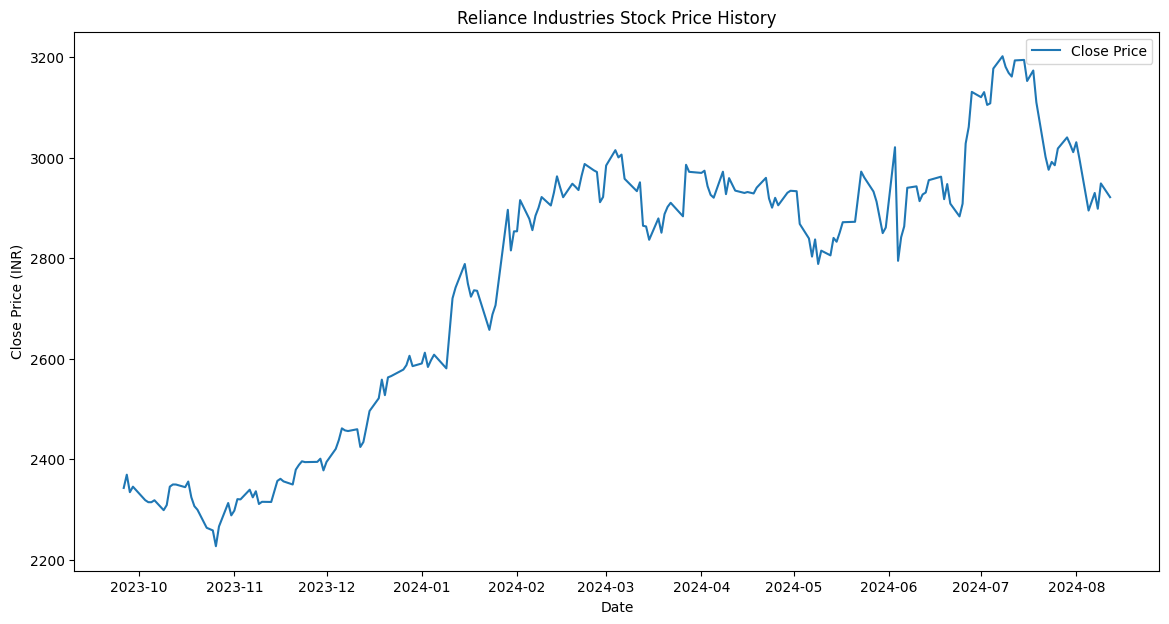

In [9]:
# Plot closing price history
plt.figure(figsize=(14,7))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.title('Reliance Industries Stock Price History')
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')
plt.legend()
plt.show()

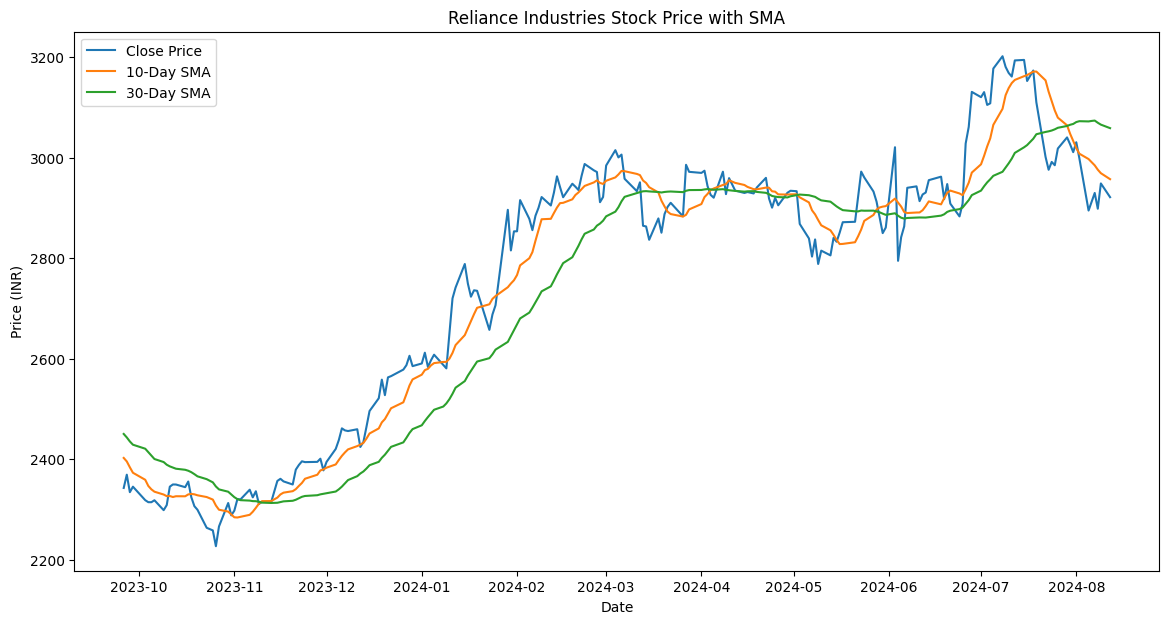

In [10]:
# Plot moving averages
plt.figure(figsize=(14,7))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['SMA_10'], label='10-Day SMA')
plt.plot(data['Date'], data['SMA_30'], label='30-Day SMA')
plt.title('Reliance Industries Stock Price with SMA')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()

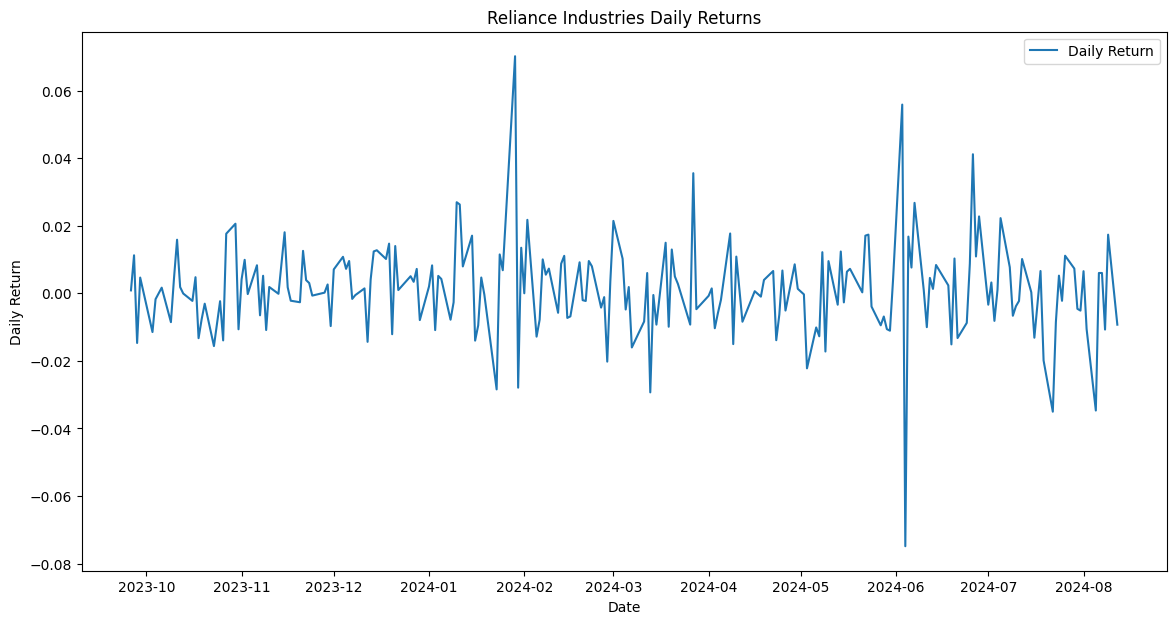

In [11]:
# Plot daily returns
plt.figure(figsize=(14,7))
plt.plot(data['Date'], data['Daily_Return'], label='Daily Return')
plt.title('Reliance Industries Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()